In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

### Task 29

define quadratic function

Define parameters for curve

In [2]:
A1 = np.array([[1, 0], [0, 1]])
B1 = np.array([0, 0])
C1 = -1

A2 = np.array([[0, 0], [0, 1]])
B2 = np.array([1, 0])
C2 = 0

Evaluate quadratic function

In [3]:
def f(P, A, B, C):
    return P.T @ A @ P + B.T @ P + C

compute result space

In [4]:
def eval(A, B, C, x, y, n):
    S = np.zeros([n, n])
    for i in range(0, n):
        for j in range(0, n):
            p = np.array([x[i], y[j]])
            S[i][j] = f(p, A, B, C)
    return S

evaluate gradient

In [5]:
def grad(xy, A, B):
    x, y = xy
    dx = 2 * A[0][0] * x + 2 * A[0, 1] * y + B[0]  # x derivative
    dy = 2 * A[1][1] * y + 2 * A[0, 1] * x + B[1]  # y derivative
    return [dx, dy]

compute curve intersection points

In [6]:
def eval_intersection(start, max_iter = 6, eps = 1e-9):
    current = start

    for i in range(0, max_iter):
        v1 = f(current, A1, B1, C1)
        v2 = f(current, A2, B2, C2)
        v = [v1, v2]

        g1 = grad(current, A1, B1)
        g2 = grad(current, A2, B2)

        jacobi = np.vstack((g1, g2))

        update = current - la.inv(jacobi) @ v

        if la.norm(update - current) < eps:
            break
        current = update
    return update

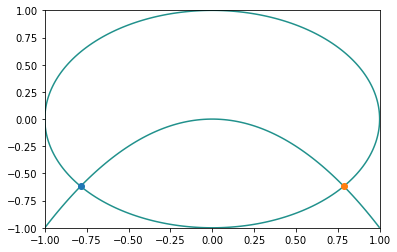

In [7]:
n = 100
x = [x for x in np.linspace(-1, 1, n)]
y = x.copy()

S1 = eval(A1, B1, C1, x, y, n)
S2 = eval(A2, B2, C2, x, y, n)

mesh1, mesh2 = np.meshgrid(x,y)

plt.contour(mesh1,mesh2,S1, 0)
plt.contour(mesh1,mesh2,S2, 0)

res1 = eval_intersection(np.array([-0.6,-0.75]))
plt.plot(res1[1], res1[0],  "o")

res2 = eval_intersection(np.array([-0.6, 0.75]))
plt.plot(res2[1], res2[0],  "o")

plt.show()

At most there are 4 intersection points (4 parabulas intersect)

### Task 30

[-0.7861513777574233, 0.7861513777574233] [-0.6180339887498949, -0.6180339887498949]


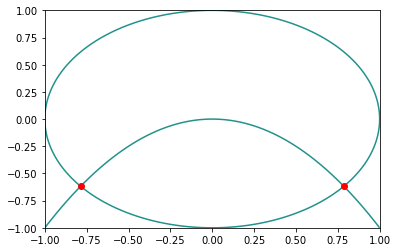

In [8]:
def criterion(f, A, B, C, bx, by):
    mp = np.asarray([(bx[0]+bx[1])*0.5, (by[0]+by[1])*0.5])
    mv = f(mp, A, B, C)

    step = 10
    incX = (bx[1] - bx[0])/step
    incY = (by[1] - by[0])/step
    if mv == 0:
        return True
    else:
        startx = bx[0]
        starty = by[0]
        for i in range(0,step):
            # walk around boundary of rectangle and check for sign differences
            currentX1 = f(np.asarray((startx+(i*incX),by[0])), A, B, C)
            currentX2 = f(np.asarray((startx+(i*incY),by[1])), A, B, C)
            currentY1 = f(np.asarray((bx[1],starty)),A, B, C)
            currentY2 = f(np.asarray((bx[1],starty)),A, B, C)
            if currentX1 == 0 or currentX2 == 0 or currentY1 == 0 or currentY2 == 0:
                return True
            elif np.sign(mv) != np.sign(currentX1) or np.sign(mv) != np.sign(currentX2)or np.sign(mv) != np.sign(currentY1) or np.sign(mv) != np.sign(currentY2):
                return True
    return False

rect = [(-1,1,-1,1)]
thr = 0.1

start = []

for i in range(100):
    if len(rect) > i:
        if criterion(f,A1,B1,C1,np.asarray(rect[i][0:2]),np.asarray(rect[i][2:4])) and criterion(f,A2,B2,C2,np.asarray(rect[i][0:2]),np.asarray(rect[i][2:4])):
            if np.abs(rect[i][1]-rect[i][0]) > thr: # check if rect is still big enough
                # subdivide rect equally in four smaller rects
                rect.append((rect[i][0],(rect[i][0] + rect[i][1])*0.5,rect[i][2],(rect[i][2] + rect[i][3])*0.5))
                rect.append(((rect[i][0] + rect[i][1]) * 0.5,rect[i][1],rect[i][2],(rect[i][2] + rect[i][3])*0.5))
                rect.append((rect[i][0],(rect[i][0] + rect[i][1])*0.5,(rect[i][2] + rect[i][3])*0.5,rect[i][3]))
                rect.append(((rect[i][0] + rect[i][1])*0.5,rect[i][1],(rect[i][2] + rect[i][3])*0.5,rect[i][3]))
            else:
                start.append([(rect[i][0] + rect[i][1])*0.5, (rect[i][2] + rect[i][3])*0.5])
    else:
        break

interX = []
interY = []
for j in range(len(start)):
    inter = eval_intersection(np.asarray(start[j]))
    # avoid double roots
    if interX.count(inter[1]) == 0 or interY.count(inter[0]) == 0:
        interX.append(inter[1])
        interY.append(inter[0])

plt.contour(mesh1,mesh2,S1, 0)
plt.contour(mesh1,mesh2,S2, 0)

print(interX, interY)
plt.plot(interX, interY, 'ro')
plt.show()
